In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Projekat 2 - 20 bodova

Dati su FASTQ fajlovi koji su rezultat sekvenciranja dela exoma koji se nalazi na hromozomu 11 (podaci su uzeti iz uzoraka 1000 Genomes projekta).
(tabela sa imenom uzoraka koji je dodeljen svakom studentu je data u fajlu Lista zadataka 2 2021).

### Rok za predaju je 3. Jun, do kraja dana.
Do datog roka je potrebno poslati rezultate emailom, na adresu grakocevic@raf.rs.

Kao rezultat projekta se potrebno je predati:  
1. Kod kojim su generisani rezultati (ipynb ili python skripta)
2. Kraći izveštaj sa tekstualnim odgovorima na pitanja i grafikonima **u PDF formatu**

Projekat je moguće raditi pojedinačno ili u paru. **Ukoliko se projekat radi u paru, svaki student predaje i brani projekat posebno, uz napomenu da je projekat urađen u paru; pri tome svaki student treba da obradi podatke iz eksperimenta koji mu dodeljen, a rad u paru se odnosi na programski kod i šablon za tekstualni izveštaj.**



### Pitanja:

1. [2 boda] Izvršiti kontrolu kvaliteta FASTQ fajlova alatom FastQC. Priložiti izvrštaj i diskutovati rezultate (da li je neki od kriterijuma koje analizira FastQC označen kao problematičan, i šta taj kriterijum znači?)
 
2. [3 boda] Mapirati sekvencirane readove na referentni genom hg38 upotrebom alata BWA Mem. Upotrebom python biblioteke pysam odrediti sledeće:  
 2a. Koliko je readova uspešno mapirano?  
 2b. Koliko je parova readova mapirano tako da su oba para mapirana?  
 2c. Nacrtati histogram dužina sekvenciranih fragmenata (*template_length*).   
   
3. [4 boda] Izvršiti obradu dobijenog BAM fajla prema GATK protokolu (Markiranje Duplikata, rekalibracija kvaliteta baza)
 3a. Koliki su procenati PCR i optičkih duplikata?

4. [4 bodova] Identifikovati mutacije upotrebom alata Haplotype Caller i filtirtati mutacije predefinisanim filterima (hard filtering) prema Broad preporukama (kao što je rađeno na vežbama).
 4a. Koliko je ukupno mutacija identifikovano, koliko od njih su SNP-ovi, a koliko INDEL-i?
 4b. Koliko mutacija prolazi, a koliko ne prolazi kriterijume filtriranja.
 4c. Izračunati Ti/Tv odnos pre i posle filtriranja.

5. [2 bodova] Anotirati mutacije alatom Funcotator
 5a. Izbrojati različite vrednosti ClinVar značajnosti (anotacija *ClinVar_VCF_CLNSIG*, koliko mutacija je označeno kao *Benign*, *Likely_benign*, itd.)-.

5. [5 bodova] Svi uzorici sadrže određenu količinu kontaminacije DNK materijalom bakterijskog ili virusnog porekla. Većina ovakvih readova se neće mapirati na ljudski genom. Izvući readove koji nisu mapirani u procesu mapiranja, asemblovati ih alatom abyss, i identifikovati organizam od kojeg potiče najduži skafold upotrebom alata Blast.

In [1]:
!apt-get install samtools

!pip install intervaltree

!pip install pysam

!wget https://github.com/broadinstitute/picard/releases/download/2.21.6/picard.jar

!wget -O gatk-4.1.4.1.zip "https://github.com/broadinstitute/gatk/releases/download/4.1.4.1/gatk-4.1.4.1.zip"
!unzip gatk-4.1.4.1.zip
!R -e 'install.packages(c("gplots", "gsalib"))'

!gdown --id 13ESrnOy32eWbPO2jEEMTtLj2vn7NBseS
!gdown --id 1_rvfN87uprNVbIX09ZcdkhLPNjoohgrQ

!git clone https://github.com/lh3/bwa.git
!cd bwa && make

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cwltool libc-ares2 libhts2 libjs-bootstrap nodejs nodejs-doc
  python-asn1crypto python-avro python-cachecontrol python-certifi
  python-cffi-backend python-chardet python-cryptography python-enum34
  python-html5lib python-idna python-ipaddress python-isodate python-lockfile
  python-mistune python-openssl python-pkg-resources python-pyparsing
  python-rdflib python-rdflib-jsonld python-requests python-ruamel.yaml
  python-schema-salad python-shellescape python-six python-sparqlwrapper
  python-typing python-urllib3 python-webencodings
Suggested packages:
  python-cryptography-doc python-cryptography-vectors python-enum34-doc
  python-genshi python-lxml python-lockfile-doc python-openssl-doc
  python-openssl-dbg python-setuptools python-pyparsing-doc python-rdflib-doc
  python-rdflib-tools python-socks python-ntlm
The following NEW pack

In [2]:
!gzip -d '/content/drive/MyDrive/sample_25.chrom11.exome.pe1.fq.gz'
!gzip -d '/content/drive/MyDrive/sample_25.chrom11.exome.pe2.fq.gz'

gzip: /content/drive/MyDrive/sample_25.chrom11.exome.pe1.fq.gz: No such file or directory
gzip: /content/drive/MyDrive/sample_25.chrom11.exome.pe2.fq.gz: No such file or directory


### 1. Izvršiti kontrolu kvaliteta FASTQ fajlova alatom FastQC. Priložiti izvrštaj i diskutovati rezultate (da li je neki od kriterijuma koje analizira FastQC označen kao problematičan, i šta taj kriterijum znači?)

....(detaljno u izveštaju)

### 2. Mapirati sekvencirane readove na referentni genom hg38 upotrebom alata BWA Mem. Upotrebom python biblioteke pysam odrediti sledeće:
2a. Koliko je readova uspešno mapirano?

2b. Koliko je parova readova mapirano tako da su oba para mapirana?


In [3]:
!pip install bwa

     |████████████████████████████████| 460kB 22.9MB/s 
     |████████████████████████████████| 61kB 6.1MB/s 
     |████████████████████████████████| 409kB 43.6MB/s 


In [ ]:
!gsutil ls gs://genomics-public-data

In [ ]:
!gsutil ls gs://genomics-public-data/resources/broad/hg38/v0

In [4]:
!gsutil cp gs://genomics-public-data/resources/broad/hg38/v0/Homo_sapiens_assembly38.fasta .

Copying gs://genomics-public-data/resources/broad/hg38/v0/Homo_sapiens_assembly38.fasta...
\ [1 files][  3.0 GiB/  3.0 GiB]   55.4 MiB/s                                   
Operation completed over 1 objects/3.0 GiB.                                      


In [37]:
!gsutil cp gs://genomics-public-data/resources/broad/hg38/v0/Homo_sapiens_assembly38.fasta.fai .

Copying gs://genomics-public-data/resources/broad/hg38/v0/Homo_sapiens_assembly38.fasta.fai...
/ [1 files][157.2 KiB/157.2 KiB]                                                
Operation completed over 1 objects/157.2 KiB.                                    


In [5]:
!bwa/bwa index Homo_sapiens_assembly38.fasta

[bwa_index] Pack FASTA... tcmalloc: large alloc 1073741824 bytes == 0x55694eff8000 @  0x7fb02c3602a4 0x5568fd38bf7b 0x5568fd374759 0x5568fd38fe30 0x5568fd39051f 0x5568fd350043 0x7fb02b57abf7 0x5568fd35017a
tcmalloc: large alloc 1608679424 bytes == 0x55698f060000 @  0x7fb02c3602a4 0x5568fd38bf7b 0x5568fd374a54 0x5568fd38fe30 0x5568fd39051f 0x5568fd350043 0x7fb02b57abf7 0x5568fd35017a
28.74 sec
[bwa_index] Construct BWT for the packed sequence...
[BWTIncCreate] textLength=6434693834, availableWord=464768632
tcmalloc: large alloc 1859076096 bytes == 0x55698f05c000 @  0x7fb02c361001 0x5568fd38be9c 0x5568fd38cc7b 0x5568fd38e4c1 0x5568fd38e874 0x5568fd390334 0x5568fd39051f 0x5568fd350043 0x7fb02b57abf7 0x5568fd35017a
[BWTIncConstructFromPacked] 10 iterations done. 99999994 characters processed.
[BWTIncConstructFromPacked] 20 iterations done. 199999994 characters processed.
[BWTIncConstructFromPacked] 30 iterations done. 299999994 characters processed.
[BWTIncConstructFromPacked] 40 iteration

In [27]:
!gsutil cp gs://genomics-public-data/resources/broad/hg38/v0/Homo_sapiens_assembly38.dbsnp138.vcf . 
!gsutil cp gs://genomics-public-data/resources/broad/hg38/v0/Homo_sapiens_assembly38.dbsnp138.vcf.idx .
!gsutil cp gs://genomics-public-data/resources/broad/hg38/v0/Homo_sapiens_assembly38.fasta .
!gsutil cp gs://genomics-public-data/resources/broad/hg38/v0/Homo_sapiens_assembly38.fasta.fai .
!gsutil cp gs://genomics-public-data/resources/broad/hg38/v0/Homo_sapiens_assembly38.dict .

Copying gs://genomics-public-data/resources/broad/hg38/v0/Homo_sapiens_assembly38.dbsnp138.vcf...
/ [1 files][ 10.2 GiB/ 10.2 GiB]   49.2 MiB/s                                   
Operation completed over 1 objects/10.2 GiB.                                     
Copying gs://genomics-public-data/resources/broad/hg38/v0/Homo_sapiens_assembly38.dbsnp138.vcf.idx...
/ [1 files][ 11.9 MiB/ 11.9 MiB]                                                
Operation completed over 1 objects/11.9 MiB.                                     
Copying gs://genomics-public-data/resources/broad/hg38/v0/Homo_sapiens_assembly38.fasta...
- [1 files][  3.0 GiB/  3.0 GiB]   49.6 MiB/s                                   
Operation completed over 1 objects/3.0 GiB.                                      
Copying gs://genomics-public-data/resources/broad/hg38/v0/Homo_sapiens_assembly38.fasta.fai...
/ [1 files][157.2 KiB/157.2 KiB]                                                
Operation completed over 1 objects/157.2 KiB

In [ ]:
# !gdown --id 1-0U11U1Z3Dp8vLHoZOtagQl25dFdza-C

Downloading...
From: https://drive.google.com/uc?id=1-0U11U1Z3Dp8vLHoZOtagQl25dFdza-C
To: /content/HG00096.chr20.exome.sorted.bam
66.0MB [00:01, 52.0MB/s]


In [ ]:
!gsutil ls gs://genomics-public-data/resources/broad/hg38/v0

In [8]:
pe1 = '/content/drive/MyDrive/sample_25.chrom11.exome.pe1.fq'
pe2 = '/content/drive/MyDrive/sample_25.chrom11.exome.pe2.fq'

# !bwa/bwa mem -M Homo_sapiens_assembly38.fasta {pe1} {pe2} > aln-pe.sam
# !bwa/bwa mem -M -R '@RG\tID:1\tPL:Illumina\tSM:HG00096' -o HG00096.chr11.exome.sam Homo_sapiens_assembly38.fasta {pe1} {pe2} 
!./bwa/bwa mem -M -R '@RG\tID:1\tPL:Illumina\tSM:HG00096' -o HG00096.chr11.exome.sam Homo_sapiens_assembly38.fasta {pe1} {pe2} 

tcmalloc: large alloc 3217350656 bytes == 0x55f378ae6000 @  0x7f1f7de01001 0x55f377f9be9c 0x55f377f82ff7 0x55f377f868a6 0x55f377f86ac8 0x55f377f79b4f 0x55f377f600d4 0x7f1f7d01abf7 0x55f377f6017a
tcmalloc: large alloc 1608679424 bytes == 0x55f438734000 @  0x7f1f7de01001 0x55f377f9be9c 0x55f377f82eed 0x55f377f868cf 0x55f377f86ac8 0x55f377f79b4f 0x55f377f600d4 0x7f1f7d01abf7 0x55f377f6017a
[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 131580 sequences (10000080 bp)...
[M::process] read 131580 sequences (10000080 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (1, 52123, 0, 1)
[M::mem_pestat] skip orientation FF as there are not enough pairs
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (107, 133, 165)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 281)
[M::mem_pestat] mean and std.dev: (138.79, 41.70)
[M::mem_pestat] low and high boundaries for proper p

In [10]:
!samtools view -b -o HG00096.chr11.exome.bam HG00096.chr11.exome.sam

In [11]:
!samtools sort -o HG00096.chr11.exome.sorted.bam HG00096.chr11.exome.bam
!samtools index HG00096.chr11.exome.sorted.bam

[bam_sort_core] merging from 1 files and 1 in-memory blocks...


In [12]:
import pysam

samfile = pysam.AlignmentFile('HG00096.chr11.exome.sorted.bam', 'rb')

cnt = 0
successful = 0
unsuccessful = 0
both_mapped = 0
template_lengths = []
for read in samfile.fetch():
    cnt+=1
    if read.is_unmapped:
        unsuccessful += 1
    else:
        if not read.mate_is_unmapped:
            both_mapped += 1
        successful += 1
    template_lengths.append(read.template_length)

    



In [13]:
print(f'Mapirano readova: {successful}\nMapiranih parova readova: {both_mapped}\nNemapirano redova:{unsuccessful}')

Mapirano readova: 3913079
Mapiranih parova readova: 3887368
Nemapirano redova:25695


2c. Nacrtati histogram dužina sekvenciranih fragmenata (template_length).

Text(0.5, 1.0, 'Template lengths')

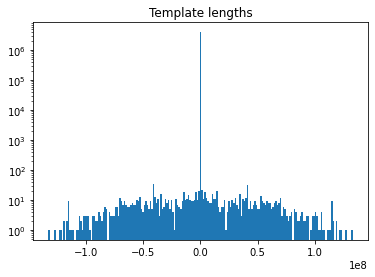

In [158]:
import matplotlib.pyplot as plt

plt.hist(template_lengths, bins=201, log=True) 
plt.title('Template lengths')



### 3. Izvršiti obradu dobijenog BAM fajla prema GATK protokolu (Markiranje Duplikata, rekalibracija kvaliteta baza) 
3a. Koliki su procenati PCR i optičkih duplikata?

In [ ]:
# pe1 = '/content/drive/MyDrive/sample_25.chrom11.exome.pe1.fq'
# pe2 = '/content/drive/MyDrive/sample_25.chrom11.exome.pe2.fq'
# ref = 'Homo_sapiens_assembly38.fasta'
 
# !./bwa/bwa mem -M -R '@RG\tID:1\tPL:Illumina\tSM:HG00096' -o HG00096.chr11.exome.sam {ref} {pe1} {pe2} 
# !samtools view -b HG00096.chr11.exome.sam > HG00096.chr11.exome.bam
# !samtools sort HG00096.chr11.exome.bam > HG00096.chr11.exome.sorted.bam

In [36]:
ibam = 'HG00096.chr11.exome.sorted.bam'
obam = 'HG00096.chr11.exome.deduped.bam'

!java -jar picard.jar MarkDuplicates I={ibam} O={obam} M=dup_metrics.txt

!grep -A2 '## METRICS CLASS' dup_metrics.txt | grep -v '## METRICS CLASS' > report.tsv

INFO	2021-06-03 14:23:32	MarkDuplicates	

********** NOTE: Picard's command line syntax is changing.
**********
********** For more information, please see:
********** https://github.com/broadinstitute/picard/wiki/Command-Line-Syntax-Transition-For-Users-(Pre-Transition)
**********
********** The command line looks like this in the new syntax:
**********
**********    MarkDuplicates -I HG00096.chr11.exome.sorted.bam -O HG00096.chr11.exome.deduped.bam -M dup_metrics.txt
**********


14:23:33.268 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/content/picard.jar!/com/intel/gkl/native/libgkl_compression.so
[Thu Jun 03 14:23:33 UTC 2021] MarkDuplicates INPUT=[HG00096.chr11.exome.sorted.bam] OUTPUT=HG00096.chr11.exome.deduped.bam METRICS_FILE=dup_metrics.txt    MAX_SEQUENCES_FOR_DISK_READ_ENDS_MAP=50000 MAX_FILE_HANDLES_FOR_READ_ENDS_MAP=8000 SORTING_COLLECTION_SIZE_RATIO=0.25 TAG_DUPLICATE_SET_MEMBERS=false REMOVE_SEQUENCING_DUPLICATES=false TAGGING_POLICY=DontTag 

In [38]:
import pandas as pd
pd.read_csv('report.tsv', sep='\t')

,LIBRARY,UNPAIRED_READS_EXAMINED,READ_PAIRS_EXAMINED,SECONDARY_OR_SUPPLEMENTARY_RDS,UNMAPPED_READS,UNPAIRED_READ_DUPLICATES,READ_PAIR_DUPLICATES,READ_PAIR_OPTICAL_DUPLICATES,PERCENT_DUPLICATION,ESTIMATED_LIBRARY_SIZE
0,Unknown Library,25695,1942489,2406,250893,15009,263630,0,0.138664,6493052


In [39]:
reader = pysam.AlignmentFile(obam)

dups = [read for read in reader if read.is_duplicate]
print(len(dups))

542269


In [40]:
ibam = 'HG00096.chr11.exome.deduped.bam'
obam = 'HG00096.chr11.exome.recalibrated.bam'
recal = 'HG00096.chr11.exome.recal.table'

dbsnp = 'Homo_sapiens_assembly38.dbsnp138.vcf'
ref = 'Homo_sapiens_assembly38.fasta'

gatk = 'java -jar gatk-4.1.4.1/gatk-package-4.1.4.1-local.jar'

In [41]:
!{gatk} BaseRecalibrator -I {ibam} --known-sites {dbsnp} -O {recal} --reference {ref}

14:26:10.369 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/content/gatk-4.1.4.1/gatk-package-4.1.4.1-local.jar!/com/intel/gkl/native/libgkl_compression.so
14:26:16.107 INFO  BaseRecalibrator - ------------------------------------------------------------
14:26:16.107 INFO  BaseRecalibrator - The Genome Analysis Toolkit (GATK) v4.1.4.1
14:26:16.107 INFO  BaseRecalibrator - For support and documentation go to https://software.broadinstitute.org/gatk/
14:26:16.108 INFO  BaseRecalibrator - Executing as root@43bfdb95a763 on Linux v5.4.109+ amd64
14:26:16.108 INFO  BaseRecalibrator - Java runtime: OpenJDK 64-Bit Server VM v11.0.11+9-Ubuntu-0ubuntu2.18.04
14:26:16.108 INFO  BaseRecalibrator - Start Date/Time: June 3, 2021 at 2:26:10 PM UTC
14:26:16.108 INFO  BaseRecalibrator - ------------------------------------------------------------
14:26:16.108 INFO  BaseRecalibrator - ------------------------------------------------------------
14:26:16.109 INFO  BaseRecalibrat

In [42]:
!{gatk} ApplyBQSR -I {ibam} -bqsr {recal} -O {obam}

14:27:43.744 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/content/gatk-4.1.4.1/gatk-package-4.1.4.1-local.jar!/com/intel/gkl/native/libgkl_compression.so
14:27:49.483 INFO  ApplyBQSR - ------------------------------------------------------------
14:27:49.483 INFO  ApplyBQSR - The Genome Analysis Toolkit (GATK) v4.1.4.1
14:27:49.483 INFO  ApplyBQSR - For support and documentation go to https://software.broadinstitute.org/gatk/
14:27:49.484 INFO  ApplyBQSR - Executing as root@43bfdb95a763 on Linux v5.4.109+ amd64
14:27:49.484 INFO  ApplyBQSR - Java runtime: OpenJDK 64-Bit Server VM v11.0.11+9-Ubuntu-0ubuntu2.18.04
14:27:49.484 INFO  ApplyBQSR - Start Date/Time: June 3, 2021 at 2:27:43 PM UTC
14:27:49.484 INFO  ApplyBQSR - ------------------------------------------------------------
14:27:49.484 INFO  ApplyBQSR - ------------------------------------------------------------
14:27:49.485 INFO  ApplyBQSR - HTSJDK Version: 2.21.0
14:27:49.486 INFO  ApplyBQSR - Pica

In [43]:
post_recal = 'HG00096.chr11.exome.post_recal.table'
!{gatk} BaseRecalibrator -I {obam} --known-sites {dbsnp} -O {post_recal} --reference {ref}

14:29:41.154 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/content/gatk-4.1.4.1/gatk-package-4.1.4.1-local.jar!/com/intel/gkl/native/libgkl_compression.so
14:29:46.837 INFO  BaseRecalibrator - ------------------------------------------------------------
14:29:46.837 INFO  BaseRecalibrator - The Genome Analysis Toolkit (GATK) v4.1.4.1
14:29:46.838 INFO  BaseRecalibrator - For support and documentation go to https://software.broadinstitute.org/gatk/
14:29:46.838 INFO  BaseRecalibrator - Executing as root@43bfdb95a763 on Linux v5.4.109+ amd64
14:29:46.838 INFO  BaseRecalibrator - Java runtime: OpenJDK 64-Bit Server VM v11.0.11+9-Ubuntu-0ubuntu2.18.04
14:29:46.838 INFO  BaseRecalibrator - Start Date/Time: June 3, 2021 at 2:29:41 PM UTC
14:29:46.839 INFO  BaseRecalibrator - ------------------------------------------------------------
14:29:46.839 INFO  BaseRecalibrator - ------------------------------------------------------------
14:29:46.839 INFO  BaseRecalibrat

In [44]:
!{gatk} AnalyzeCovariates -before {recal} -after {post_recal} -plots 'compare.pdf'

14:31:05.747 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/content/gatk-4.1.4.1/gatk-package-4.1.4.1-local.jar!/com/intel/gkl/native/libgkl_compression.so
14:31:11.476 INFO  AnalyzeCovariates - ------------------------------------------------------------
14:31:11.477 INFO  AnalyzeCovariates - The Genome Analysis Toolkit (GATK) v4.1.4.1
14:31:11.477 INFO  AnalyzeCovariates - For support and documentation go to https://software.broadinstitute.org/gatk/
14:31:11.477 INFO  AnalyzeCovariates - Executing as root@43bfdb95a763 on Linux v5.4.109+ amd64
14:31:11.477 INFO  AnalyzeCovariates - Java runtime: OpenJDK 64-Bit Server VM v11.0.11+9-Ubuntu-0ubuntu2.18.04
14:31:11.478 INFO  AnalyzeCovariates - Start Date/Time: June 3, 2021 at 2:31:05 PM UTC
14:31:11.478 INFO  AnalyzeCovariates - ------------------------------------------------------------
14:31:11.478 INFO  AnalyzeCovariates - ------------------------------------------------------------
14:31:11.479 INFO  Analyz

### 4. Identifikovati mutacije upotrebom alata Haplotype Caller i filtirtati mutacije predefinisanim filterima (hard filtering) prema Broad preporukama (kao što je rađeno na vežbama). 4a. Koliko je ukupno mutacija identifikovano, koliko od njih su SNP-ovi, a koliko INDEL-i? 4b. Koliko mutacija prolazi, a koliko ne prolazi kriterijume filtriranja. 4c. Izračunati Ti/Tv odnos pre i posle filtriranja.



In [45]:
gatk = 'java -jar gatk-4.1.4.1/gatk-package-4.1.4.1-local.jar'
dbsnp = 'Homo_sapiens_assembly38.dbsnp138.vcf'
ref = 'Homo_sapiens_assembly38.fasta'

ibam = 'HG00096.chr11.exome.recalibrated.bam'
ovcf = 'HG00096.chr11.exome.vcf'

!{gatk} HaplotypeCaller --input {ibam} --output {ovcf} --reference {ref} --dbsnp {dbsnp} -L chr11

14:31:30.402 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/content/gatk-4.1.4.1/gatk-package-4.1.4.1-local.jar!/com/intel/gkl/native/libgkl_compression.so
14:31:36.073 INFO  HaplotypeCaller - ------------------------------------------------------------
14:31:36.073 INFO  HaplotypeCaller - The Genome Analysis Toolkit (GATK) v4.1.4.1
14:31:36.073 INFO  HaplotypeCaller - For support and documentation go to https://software.broadinstitute.org/gatk/
14:31:36.073 INFO  HaplotypeCaller - Executing as root@43bfdb95a763 on Linux v5.4.109+ amd64
14:31:36.074 INFO  HaplotypeCaller - Java runtime: OpenJDK 64-Bit Server VM v11.0.11+9-Ubuntu-0ubuntu2.18.04
14:31:36.074 INFO  HaplotypeCaller - Start Date/Time: June 3, 2021 at 2:31:30 PM UTC
14:31:36.074 INFO  HaplotypeCaller - ------------------------------------------------------------
14:31:36.074 INFO  HaplotypeCaller - ------------------------------------------------------------
14:31:36.075 INFO  HaplotypeCaller - HTSJ

In [46]:
def is_snp(variant):
  return len(variant.ref) == 1 and len(variant.alts[0]) == 1

def is_transitions(variant):
  allels = set((variant.ref, variant.alts[0]))
  return allels == {'A', 'G'} or allels == {'C', 'T'}

In [47]:
from collections import Counter

Counter(v.id == None for v in pysam.VariantFile(ovcf))

Counter({False: 5314, True: 456})

In [48]:
ti = sum(1 for v in pysam.VariantFile(ovcf) \
         if is_snp(v)\
         and is_transitions(v))

tv = sum(1 for v in pysam.VariantFile(ovcf) \
          if is_snp(v) \
          and not is_transitions(v))

print('Before filter:')
print('Ti:', ti)
print('Tv:', tv)
print('Ti/Tv', ti/tv)

Before filter:
Ti: 3612
Tv: 1625
Ti/Tv 2.222769230769231


In [49]:
gatk = 'java -jar gatk-4.1.4.1/gatk-package-4.1.4.1-local.jar'

snp_f = "QD < 2.0 || FS > 60.0 || MQ < 40.0 || MQRankSum < -12.5 || ReadPosRankSum < -8.0"
indel_f = "QD < 2.0 || FS > 200.0 || ReadPosRankSum < -20.0" 

ref = 'Homo_sapiens_assembly38.fasta'

ivcf = 'HG00096.chr11.exome.vcf'
isvcf = 'HG00096.chr11.exome.snp.vcf'
iivcf = 'HG00096.chr11.exome.indel.vcf'


osvcf = 'HG00096.chr11.exome.snp.filtered.vcf'
oivcf = 'HG00096.chr11.exome.indel.filtered.vcf'
ovcf = 'HG00096.chr11.exome.filtered.vcf'

In [50]:
!{gatk} SelectVariants -R {ref} -V {ivcf} -O {isvcf} --select-type-to-include SNP
!{gatk} VariantFiltration -R {ref} -V {isvcf} -O {osvcf} -filter "{snp_f}" --filter-name "snp"

!{gatk} SelectVariants -R {ref} -V {ivcf} -O {iivcf} --select-type-to-include INDEL
!{gatk} VariantFiltration -R {ref} -V {iivcf} -O {oivcf} -filter "{indel_f}" --filter-name "indel"

!{gatk} MergeVcfs -I {osvcf} -I {oivcf} -O {ovcf}

14:41:23.808 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/content/gatk-4.1.4.1/gatk-package-4.1.4.1-local.jar!/com/intel/gkl/native/libgkl_compression.so
14:41:29.555 INFO  SelectVariants - ------------------------------------------------------------
14:41:29.556 INFO  SelectVariants - The Genome Analysis Toolkit (GATK) v4.1.4.1
14:41:29.556 INFO  SelectVariants - For support and documentation go to https://software.broadinstitute.org/gatk/
14:41:29.557 INFO  SelectVariants - Executing as root@43bfdb95a763 on Linux v5.4.109+ amd64
14:41:29.557 INFO  SelectVariants - Java runtime: OpenJDK 64-Bit Server VM v11.0.11+9-Ubuntu-0ubuntu2.18.04
14:41:29.558 INFO  SelectVariants - Start Date/Time: June 3, 2021 at 2:41:23 PM UTC
14:41:29.558 INFO  SelectVariants - ------------------------------------------------------------
14:41:29.558 INFO  SelectVariants - ------------------------------------------------------------
14:41:29.559 INFO  SelectVariants - HTSJDK Versio

In [51]:
def is_filtered(variant):
  return 'PASS' not in variant.filter

def is_snp(variant):
  return len(variant.ref) == 1 and len(variant.alts[0]) == 1

def is_transitions(variant):
  allels = set((variant.ref, variant.alts[0]))
  return allels == {'A', 'G'} or allels == {'C', 'T'}

In [52]:
ovcf = 'HG00096.chr11.exome.filtered.vcf'

# print('SNPs:',
#       sum(1 for v in pysam.VariantFile(ovcf) if is_filtered(v) and is_snp(v)))

# print('INDELs:',
#       sum(1 for v in pysam.VariantFile(ovcf) if is_filtered(v) and not is_snp(v)))

snp = 0
ind = 0

for v in pysam.VariantFile(ovcf):
    if is_snp(v):
        snp += 1
    else:
        ind += 1

print(f'SNPs: {snp}, INDELs: {ind}, Sum: {snp + ind}')

SNPs: 5235, INDELs: 532, Sum: 5767


In [53]:
proslo = 0
nije_proslo = 0

for v in pysam.VariantFile(ovcf):
    if is_filtered(v):
        nije_proslo += 1
    else:
        proslo += 1

print(f'Passed filter: {proslo}, Did not pass filter: {nije_proslo}')

Passed filter: 5577, Did not pass filter: 190


In [54]:
ti = sum(1 for v in pysam.VariantFile(ovcf) \
         if not is_filtered(v) \
         and is_snp(v)\
         and is_transitions(v))

tv = sum(1 for v in pysam.VariantFile(ovcf) \
          if not is_filtered(v) \
          and is_snp(v) \
          and not is_transitions(v))

print('After filter:')
print('Ti:', ti)
print('Tv:', tv)
print('Ti/Tv', ti/tv)

After filter:
Ti: 3489
Tv: 1567
Ti/Tv 2.226547543075941


###5. Anotirati mutacije alatom Funcotator 5a. Izbrojati različite vrednosti ClinVar značajnosti (anotacija ClinVar_VCF_CLNSIG, koliko mutacija je označeno kao Benign, Likely_benign, itd.)-.

In [55]:
!{gatk} FuncotatorDataSourceDownloader --germline --extract-after-download

14:42:18.824 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/content/gatk-4.1.4.1/gatk-package-4.1.4.1-local.jar!/com/intel/gkl/native/libgkl_compression.so
14:42:24.531 INFO  FuncotatorDataSourceDownloader - ------------------------------------------------------------
14:42:24.532 INFO  FuncotatorDataSourceDownloader - The Genome Analysis Toolkit (GATK) v4.1.4.1
14:42:24.532 INFO  FuncotatorDataSourceDownloader - For support and documentation go to https://software.broadinstitute.org/gatk/
14:42:24.532 INFO  FuncotatorDataSourceDownloader - Executing as root@43bfdb95a763 on Linux v5.4.109+ amd64
14:42:24.532 INFO  FuncotatorDataSourceDownloader - Java runtime: OpenJDK 64-Bit Server VM v11.0.11+9-Ubuntu-0ubuntu2.18.04
14:42:24.533 INFO  FuncotatorDataSourceDownloader - Start Date/Time: June 3, 2021 at 2:42:18 PM UTC
14:42:24.533 INFO  FuncotatorDataSourceDownloader - ------------------------------------------------------------
14:42:24.533 INFO  FuncotatorDataS

In [56]:
ivcf = 'HG00096.chr11.exome.filtered.vcf'
ovcf = 'HG00096.chr11.exome.annotated.vcf'
func = 'funcotator_dataSources.v1.6.20190124g/'

!{gatk} Funcotator -O {ovcf} --ref-version hg38 -R {ref} -V {ivcf} --output-file-format VCF --data-sources-path {func}

14:43:28.839 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/content/gatk-4.1.4.1/gatk-package-4.1.4.1-local.jar!/com/intel/gkl/native/libgkl_compression.so
14:43:34.585 INFO  Funcotator - ------------------------------------------------------------
14:43:34.586 INFO  Funcotator - The Genome Analysis Toolkit (GATK) v4.1.4.1
14:43:34.586 INFO  Funcotator - For support and documentation go to https://software.broadinstitute.org/gatk/
14:43:34.587 INFO  Funcotator - Executing as root@43bfdb95a763 on Linux v5.4.109+ amd64
14:43:34.587 INFO  Funcotator - Java runtime: OpenJDK 64-Bit Server VM v11.0.11+9-Ubuntu-0ubuntu2.18.04
14:43:34.587 INFO  Funcotator - Start Date/Time: June 3, 2021 at 2:43:28 PM UTC
14:43:34.587 INFO  Funcotator - ------------------------------------------------------------
14:43:34.587 INFO  Funcotator - ------------------------------------------------------------
14:43:34.588 INFO  Funcotator - HTSJDK Version: 2.21.0
14:43:34.588 INFO  Funcota

In [57]:
reader = pysam.VariantFile(ovcf)
description = reader.header.info['FUNCOTATION'].description
print(description)
funcotations = description[73:].split('|')

Functional annotation from the Funcotator tool.  Funcotation fields are: Gencode_27_hugoSymbol|Gencode_27_ncbiBuild|Gencode_27_chromosome|Gencode_27_start|Gencode_27_end|Gencode_27_variantClassification|Gencode_27_secondaryVariantClassification|Gencode_27_variantType|Gencode_27_refAllele|Gencode_27_tumorSeqAllele1|Gencode_27_tumorSeqAllele2|Gencode_27_genomeChange|Gencode_27_annotationTranscript|Gencode_27_transcriptStrand|Gencode_27_transcriptExon|Gencode_27_transcriptPos|Gencode_27_cDnaChange|Gencode_27_codonChange|Gencode_27_proteinChange|Gencode_27_gcContent|Gencode_27_referenceContext|Gencode_27_otherTranscripts|ACMGLMMLof_LOF_Mechanism|ACMGLMMLof_Mode_of_Inheritance|ACMGLMMLof_Notes|ACMG_recommendation_Disease_Name|ClinVar_VCF_AF_ESP|ClinVar_VCF_AF_EXAC|ClinVar_VCF_AF_TGP|ClinVar_VCF_ALLELEID|ClinVar_VCF_CLNDISDB|ClinVar_VCF_CLNDISDBINCL|ClinVar_VCF_CLNDN|ClinVar_VCF_CLNDNINCL|ClinVar_VCF_CLNHGVS|ClinVar_VCF_CLNREVSTAT|ClinVar_VCF_CLNSIG|ClinVar_VCF_CLNSIGCONF|ClinVar_VCF_CLNSIGI

In [58]:
print('\n'.join(funcotations))

Gencode_27_hugoSymbol
Gencode_27_ncbiBuild
Gencode_27_chromosome
Gencode_27_start
Gencode_27_end
Gencode_27_variantClassification
Gencode_27_secondaryVariantClassification
Gencode_27_variantType
Gencode_27_refAllele
Gencode_27_tumorSeqAllele1
Gencode_27_tumorSeqAllele2
Gencode_27_genomeChange
Gencode_27_annotationTranscript
Gencode_27_transcriptStrand
Gencode_27_transcriptExon
Gencode_27_transcriptPos
Gencode_27_cDnaChange
Gencode_27_codonChange
Gencode_27_proteinChange
Gencode_27_gcContent
Gencode_27_referenceContext
Gencode_27_otherTranscripts
ACMGLMMLof_LOF_Mechanism
ACMGLMMLof_Mode_of_Inheritance
ACMGLMMLof_Notes
ACMG_recommendation_Disease_Name
ClinVar_VCF_AF_ESP
ClinVar_VCF_AF_EXAC
ClinVar_VCF_AF_TGP
ClinVar_VCF_ALLELEID
ClinVar_VCF_CLNDISDB
ClinVar_VCF_CLNDISDBINCL
ClinVar_VCF_CLNDN
ClinVar_VCF_CLNDNINCL
ClinVar_VCF_CLNHGVS
ClinVar_VCF_CLNREVSTAT
ClinVar_VCF_CLNSIG
ClinVar_VCF_CLNSIGCONF
ClinVar_VCF_CLNSIGINCL
ClinVar_VCF_CLNVC
ClinVar_VCF_CLNVCSO
ClinVar_VCF_CLNVI
ClinVar_VCF_D

In [159]:
cnt = 0
results = dict()

for variant in pysam.VariantFile(ovcf):
    try:
        ann = {x:y for x, y in zip(funcotations, variant.info['FUNCOTATION'][0][1:-1].split('|'))}
    except:
        cnt += 1
        pass

    if ann['ClinVar_VCF_CLNSIG']:
        # print(ann['ClinVar_VCF_CLNSIG'])
        if ann['ClinVar_VCF_CLNSIG'] not in results.keys():
            results[ann['ClinVar_VCF_CLNSIG']] = 0
        else:
            results[str(ann['ClinVar_VCF_CLNSIG'])] += 1


for tp, num in results.items():
    if num == 0:
        continue
    print('{} {}'.format(tp, num))

Benign 235
Benign/Likely_benign 47
not_provided 4
Likely_benign 23
Uncertain_significance 1
drug_response 1


### 6. Svi uzorici sadrže određenu količinu kontaminacije DNK materijalom bakterijskog ili virusnog porekla. Većina ovakvih readova se neće mapirati na ljudski genom. Izvući readove koji nisu mapirani u procesu mapiranja, asemblovati ih alatom abyss, i identifikovati organizam od kojeg potiče najduži skafold upotrebom alata Blast.

In [ ]:
# !pip install abyss

!sudo apt-get install autotools-dev automake
!git clone https://github.com/bcgsc/abyss.git
!cd abyss && ./autogen.sh
!cd abyss && ./configure
!cd abyss && make
!cd abyss && sudo make install
 
!sudo apt-get install abyss

In [ ]:
#%%time
!git clone https://github.com/sparsehash/sparsehash.git
!cd sparsehash && ./configure
!cd sparsehash && make
!cd sparsehash && sudo make install

In [146]:
# HG00096.chr11.exome.sorted.bam

file = 'HG00096.chr11.filtered.exome.bam'

sf = pysam.AlignmentFile('HG00096.chr11.exome.sorted.bam', 'rb')
f = pysam.AlignmentFile(file, 'wb', template=sf)

for read in sf.fetch():
    if read.is_unmapped:
        f.write(read)



In [144]:
!samtools split HG00096.chr11.filtered.exome.bam

[W::bam_hdr_read] EOF marker is absent. The input is probably truncated


In [147]:
!samtools fastq -1 reads_1.fq -2 reads_2.fq HG00096.chr11.filtered.exome.bam

[M::bam2fq_mainloop] discarded 0 singletons
[M::bam2fq_mainloop] processed 25695 reads


In [140]:
# !sed 's|.1 |/1 |g' <reads1.fq >reads2.fq

In [148]:
!abyss-pe name=human1 k=64 in='reads_1.fq reads_2.fq'

ABYSS -k64 -q3    --coverage-hist=coverage.hist -s human1-bubbles.fa  -o human1-1.fa reads_1.fq reads_2.fq 
ABySS 2.0.2
ABYSS -k64 -q3 --coverage-hist=coverage.hist -s human1-bubbles.fa -o human1-1.fa reads_1.fq reads_2.fq
Reading `reads_1.fq'...
`reads_1.fq': discarded 19854 reads shorter than 64 bases
Reading `reads_2.fq'...
`reads_2.fq': discarded 5720 reads shorter than 64 bases
Loaded 6737 k-mer
Unable to determine minimum k-mer coverage
Using a coverage threshold of 1...
The median k-mer coverage is 1
The reconstruction is 6737
The k-mer coverage threshold is 1
Setting parameter e (erode) to 2
Setting parameter E (erodeStrand) to 0
Setting parameter c (coverage) to 2
Generating adjacency
Added 13326 edges.
Eroding tips
Eroded 5610 tips.
Eroded 0 tips.
Pruning tips shorter than 1 bp...
Pruning tips shorter than 2 bp...
Pruning tips shorter than 4 bp...
Pruning tips shorter than 8 bp...
Pruning tips shorter than 16 bp...
Pruned 26 k-mer in 4 tips.
Pruning tips shorter than 32 bp...

In [154]:
from glob import glob

for f in glob('*unitigs.fa'):
  try:
      scaffolds = pysam.FastaFile(f)
  except:
      pass
  longest = sorted(zip(scaffolds.lengths, scaffolds.references), 
                   reverse=True)[0][1]
  un = scaffolds.fetch(longest)
  print(f, len(un), un)

human1-unitigs.fa 466 TAAAAAGTCCTTTAAATTCTGGATTAACTGAAATTATAACAAGTTGTTTATCTCGTATAATGCTATATTTTGTGAAAGCAACAAATTTAGTTAAAGTATTTCCATCATCATTCCAAGCATTAATACTTAATAATTTGTCATACGTGCTACTAAGATCTTTTATAAATTGTTCCCCACGTTCTGTATAACCGCTTAGTTTTTTCAAATCGTGAAATGAAAAAATAATCTCATCTACACCTTTTTCACGTACACGTGAAGCAATTGAAAAAAATAAGTTCATTTCACGACTATTAAATTTTCTCAGAGGAATATGATTTAATCTATTTTCATATTTTACAATTTCATTTGCCATAAGCTTCTCCTACTTTTATAAAGTATGAAATAAAAGTAACATACTTTATAAAAATACTCAATAATGTCGGAAAACCTACTTGAAAAGCGTAGAAAACCTACTTGAAAAGCGTAG
human-unitigs.fa 466 TAAAAAGTCCTTTAAATTCTGGATTAACTGAAATTATAACAAGTTGTTTATCTCGTATAATGCTATATTTTGTGAAAGCAACAAATTTAGTTAAAGTATTTCCATCATCATTCCAAGCATTAATACTTAATAATTTGTCATACGTGCTACTAAGATCTTTTATAAATTGTTCCCCACGTTCTGTATAACCGCTTAGTTTTTTCAAATCGTGAAATGAAAAAATAATCTCATCTACACCTTTTTCACGTACACGTGAAGCAATTGAAAAAAATAAGTTCATTTCACGACTATTAAATTTTCTCAGAGGAATATGATTTAATCTATTTTCATATTTTACAATTTCATTTGCCATAAGCTTCTCCTACTTTTATAAAGTATGAAATAAAAGTAACATACTTTATAAAAATACTCAATAATGTCGGAAAACCTACTTGAAAAGCGTAGAAAACCTACTTGAAAAGCGTAG
